### San Francisco State University: School of Engineering
### ENGR 463: Final Exam Project (Spring 2023)
### By Elon Goliger Mallimson
### Professor: Dr. Douglas Couldron
### Date: 5/10/2023
#### Part A: Variable Speed, Constant Load Test
##### Setup variables and dependencies as well as given data

In [40]:
#dependencies
from pint import UnitRegistry
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#unit setup
ureg = UnitRegistry()
m = ureg.meter
g = ureg.gram
kg = ureg.kilogram
s = ureg.second
min = ureg.minute
hr = ureg.hour
rpm = ureg.revolution / min
turns = ureg.turn
kPa = ureg.kilopascal
W = ureg.watt
N = ureg.newton
K = ureg.kelvin

#variable array setup
speed = ureg.Quantity(np.array([1500, 2000, 2500, 3000, 3500, 4000]), rpm)
torque = ureg.Quantity(np.array([1.8, 1.8, 1.8, 1.8, 1.8, 1.8]), N * m)
Qdot_shaft = ureg.Quantity(np.array([None, None, None, None, None, None]), W) # Qdot_shaft
Qdot_in = ureg.Quantity(np.array([None, None, None, None, None, None]), W) # heat input
efficiency = np.array([None, None, None, None, None, None]) # n_th percent
MEP = ureg.Quantity(np.array([None, None, None, None, None, None]), kPa) # mean effective pressure
bsfc = ureg.Quantity(np.array([None, None, None, None, None, None]), g / (W * hr)) # brake specific fuel consumption
Qdot_exhaust = ureg.Quantity(np.array([None, None, None, None, None, None]), W) # exhaust heat
Qdot_fins = ureg.Quantity(np.array([None, None, None, None, None, None]), W) # fins heat
mdot_air = ureg.Quantity(np.array([None, None, None, None, None, None]), kg/s) # mass flow rate of air
mdot_fuel = ureg.Quantity(np.array([5.55E-05, 5.64E-05, 6.83E-05, 8.26E-05, 0.000104, 0.000118]), kg / s) # mass flow rate of fuel
deltaT = ureg.Quantity(np.array([247, 247, 247, 291, 330, 350]), K) # temperature difference

#given value
D = 10**-4 * m**3 # displacement of the engine: given 100cc
#constants
rho_air = 1.2 * ureg.kilogram / ureg.meter**3
Cp_air = 1.006 * ureg.kilojoule / (ureg.kilogram * ureg.kelvin)
LHV_gas = 45.2 * ureg.kilojoule / ureg.gram

##### Calculations

In [41]:
mdot_air = (rho_air * D * speed) / (2*turns) # The 2 is present in the denominator because engine will only draw air every second revolution
mdot_air = mdot_air.to(kg / s)
Qdot_exhaust = mdot_air * Cp_air * deltaT
Qdot_in = mdot_fuel * LHV_gas
Qdot_in = Qdot_in.to(W)
Qdot_shaft = speed*torque
Qdot_shaft = Qdot_shaft.to(W)
Qdot_fins = Qdot_in - Qdot_exhaust - Qdot_shaft
efficiency = (Qdot_shaft / Qdot_in)*100 # n_th percent
bsfc = mdot_fuel / Qdot_shaft
bsfs = bsfc.to(g / (W * hr))
MEP = (4 * np.pi * torque )/ D
MEP = MEP.to(kPa)

##### Table A

In [42]:
# Create a dictionary with the column names and data
data = {
    'Speed (RPM)': speed.magnitude,
    'Torque (N * m)': torque.magnitude,
    'Power Shaft (W)': Qdot_shaft.magnitude,
    'Power Input (W)': Qdot_in.magnitude,
    'Efficiency (%)': efficiency.magnitude,
    'MEP (kPa)': MEP.magnitude,
    'BSFC (g/(W*h))': bsfc.magnitude,
    'Exhaust Heat (W)': Qdot_exhaust.magnitude,
    'Fins Heat (W)': Qdot_fins.magnitude,
    'Air Mass Flow (kg/s)': mdot_air.magnitude,
    'Fuel Mass Flow (kg/s)': mdot_fuel.magnitude,
    'Delta T (delta_K)': deltaT.magnitude
}

# Create a DataFrame from the dictionary and add a caption
df = pd.DataFrame(data)
df

,Speed (RPM),Torque (N * m),Power Shaft (W),Power Input (W),Efficiency (%),MEP (kPa),BSFC (g/(W*h)),Exhaust Heat (W),Fins Heat (W),Air Mass Flow (kg/s),Fuel Mass Flow (kg/s),Delta T (delta_K)
0,1500,1.8,282.743339,2508.60,11.270961,226.194671,1.962911e-07,0.372723,1853.133661,0.0015,0.000056,247
1,2000,1.8,376.991118,2549.28,14.788141,226.194671,1.496056e-07,0.496964,1675.324882,0.0020,0.000056,247
2,2500,1.8,471.238898,3087.16,15.264479,226.194671,1.449371e-07,0.621205,1994.716102,0.0025,0.000068,247
3,3000,1.8,565.486678,3733.52,15.146207,226.194671,1.460689e-07,0.878238,2289.795322,0.0030,0.000083,291
4,3500,1.8,659.734457,4700.80,14.034514,226.194671,1.576392e-07,1.161930,2879.135543,0.0035,0.000104,330
5,4000,1.8,753.982237,5333.60,14.136460,226.194671,1.565024e-07,1.408400,3171.217763,0.0040,0.000118,350


##### Graphs

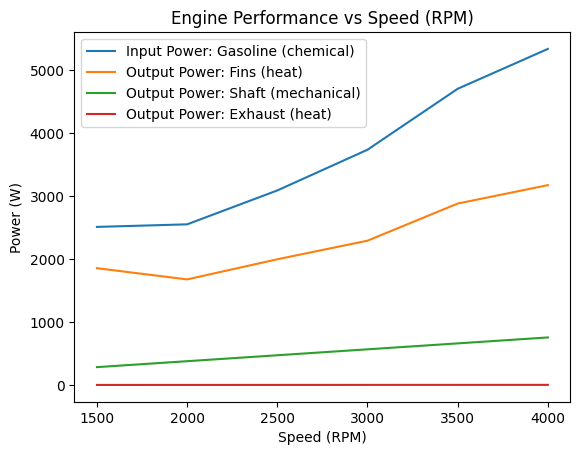

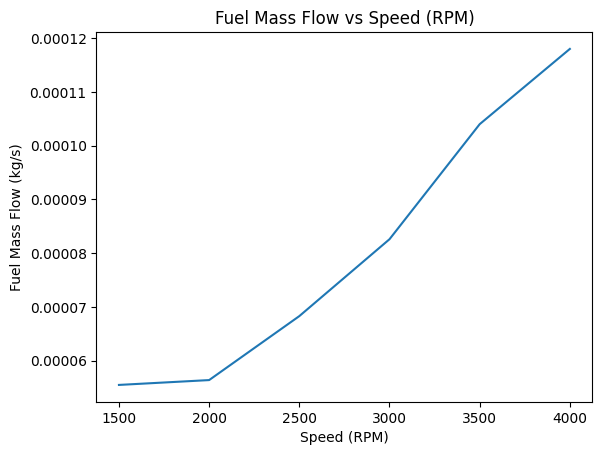

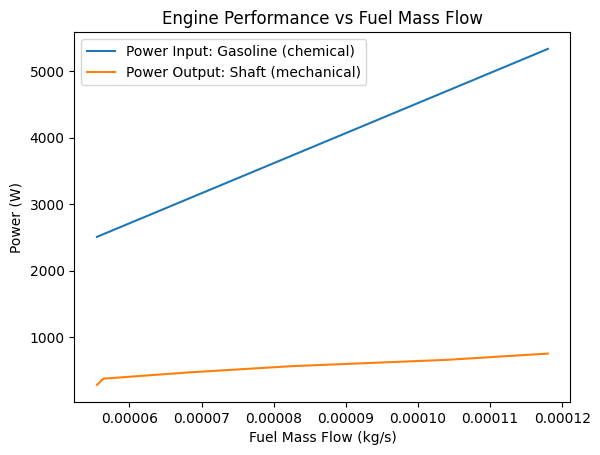

In [43]:
# Plot Qdot_shaft, Qdot_in, Qdot_exhaust, Qdot_fins vs RPM
plt.figure()
plt.plot(df['Speed (RPM)'], df['Power Input (W)'], label="Input Power: Gasoline (chemical)")
plt.plot(df['Speed (RPM)'], df['Fins Heat (W)'], label="Output Power: Fins (heat)")
plt.plot(df['Speed (RPM)'], df['Power Shaft (W)'], label="Output Power: Shaft (mechanical)")
plt.plot(df['Speed (RPM)'], df['Exhaust Heat (W)'], label="Output Power: Exhaust (heat)")
plt.xlabel('Speed (RPM)')
plt.ylabel('Power (W)')
plt.legend()
plt.title('Engine Performance vs Speed (RPM)')
plt.show()

# Plot fuel flow rate vs rpm
plt.figure()
plt.plot(df['Speed (RPM)'], df['Fuel Mass Flow (kg/s)'])
plt.xlabel('Speed (RPM)')
plt.ylabel('Fuel Mass Flow (kg/s)')
plt.title('Fuel Mass Flow vs Speed (RPM)')
plt.show()

# Plot Qdot_shaft, Qdot_in vs fuel flow rate
plt.figure()
plt.plot(df['Fuel Mass Flow (kg/s)'], df['Power Input (W)'], label="Power Input: Gasoline (chemical)")
plt.plot(df['Fuel Mass Flow (kg/s)'], df['Power Shaft (W)'], label="Power Output: Shaft (mechanical)")
plt.xlabel('Fuel Mass Flow (kg/s)')
plt.ylabel('Power (W)')
plt.legend()
plt.title('Engine Performance vs Fuel Mass Flow')
plt.show()

#### Part B: Constant Speed (1500 RPM), Variable Load Test
##### Setup variables and dependencies as well as given data

In [44]:
#variable array setup
percent_load = np.array([0.75, 1, 1.25, 1.5, 1.75, 2]) # percent
speed = ureg.Quantity(np.array([1500, 1500, 1500, 1500, 1500, 1500]), rpm) # rpm
torque = ureg.Quantity(np.array([1.35, 1.8, None, None, None, None]), N * m)
Qdot_shaft = ureg.Quantity(np.array([None, None, None, None, None, None]), W) # Qdot_shaft
Qdot_in = ureg.Quantity(np.array([None, None, None, None, None, None]), W) # heat input
efficiency = np.array([None, None, None, None, None, None]) # n_th percent
MEP = ureg.Quantity(np.array([169.64, 226.19, None, None, None, None]), kPa) # mean effective pressure
bsfc = ureg.Quantity(np.array([None, None, None, None, None, None]), g / (W * hr)) # brake specific fuel consumption
Qdot_exhaust = ureg.Quantity(np.array([None, None, None, None, None, None]), W) # exhaust heat
Qdot_fins = ureg.Quantity(np.array([None, None, None, None, None, None]), W) # fins heat
mdot_air = ureg.Quantity(np.array([None, None, None, None, None, None]), kg/s) # mass flow rate of air
mdot_fuel = ureg.Quantity(np.array([4.931E-05, 5.547E-05, 8.452E-05, 8.452E-05, 9.342E-05, 0.000118]), kg / s) # mass flow rate of fuel
deltaT = ureg.Quantity(np.array([235, 247, 250, 288, 314, 345]), K) # temperature difference

##### Calculations

In [45]:
# Calculate slope of load-torque line
slope = (torque[1].magnitude - torque[0].magnitude) / (percent_load[1] - percent_load[0])

# Calculate torque for remaining percent loads
for i in range(2, len(percent_load)):
    torque[i] = (slope * (percent_load[i] - percent_load[1]) + torque[1].magnitude) * N * m

mdot_air = (rho_air * D * speed) / (2*turns) # The 2 is present in the denominator because engine will only draw air every second revolution
mdot_air = mdot_air.to(kg / s)
Qdot_exhaust = mdot_air * Cp_air * deltaT
Qdot_in = mdot_fuel * LHV_gas
Qdot_in = Qdot_in.to(W)
Qdot_shaft = speed*torque
Qdot_shaft = Qdot_shaft.to(W)
Qdot_fins = Qdot_in - Qdot_exhaust - Qdot_shaft
efficiency = (Qdot_shaft / Qdot_in)*100 # n_th percent
bsfc = mdot_fuel / Qdot_shaft
bsfc = bsfc.to(g / (W * hr))
MEP = (4 * np.pi * torque )/ D
MEP = MEP.to(kPa)

##### Table B

In [46]:
# Create a dictionary with the column names and data
data = {
    'Speed (RPM)': speed.magnitude,
    'Torque (N * m)': torque.magnitude,
    'Power Shaft (W)': Qdot_shaft.magnitude,
    'Power Input (W)': Qdot_in.magnitude,
    'Efficiency (%)': efficiency.magnitude,
    'MEP (kPa)': MEP.magnitude,
    'BSFC (g/(W*h))': bsfc.magnitude,
    'Exhaust Heat (W)': Qdot_exhaust.magnitude,
    'Fins Heat (W)': Qdot_fins.magnitude,
    'Air Mass Flow (kg/s)': mdot_air.magnitude,
    'Fuel Mass Flow (kg/s)': mdot_fuel.magnitude,
    'Delta T (delta_K)': deltaT.magnitude
}

# Create a DataFrame from the dictionary and add a caption
df = pd.DataFrame(data)
df

,Speed (RPM),Torque (N * m),Power Shaft (W),Power Input (W),Efficiency (%),MEP (kPa),BSFC (g/(W*h)),Exhaust Heat (W),Fins Heat (W),Air Mass Flow (kg/s),Fuel Mass Flow (kg/s),Delta T (delta_K)
0,1500,1.35,212.057504,2228.812,9.514374,169.646003,0.837113,0.354615,1662.139496,0.0015,0.000049,235
1,1500,1.8,282.743339,2507.244,11.277057,226.194671,0.706266,0.372723,1851.777661,0.0015,0.000055,247
2,1500,2.25,353.429174,3820.304,9.251336,282.743339,0.860914,0.377250,3089.624826,0.0015,0.000085,250
3,1500,2.7,424.115008,3820.304,11.101604,339.292007,0.717428,0.434592,2961.596992,0.0015,0.000085,288
4,1500,3.15,494.800843,4222.584,11.717963,395.840674,0.679692,0.473826,3253.957157,0.0015,0.000093,314
5,1500,3.6,565.486678,5333.600,10.602345,452.389342,0.751211,0.520605,4247.508322,0.0015,0.000118,345


##### Graphs

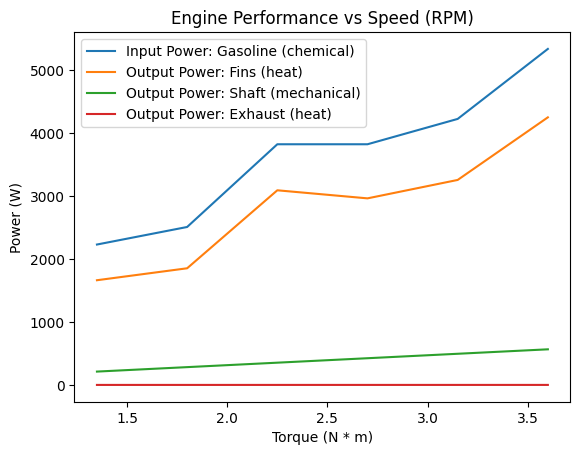

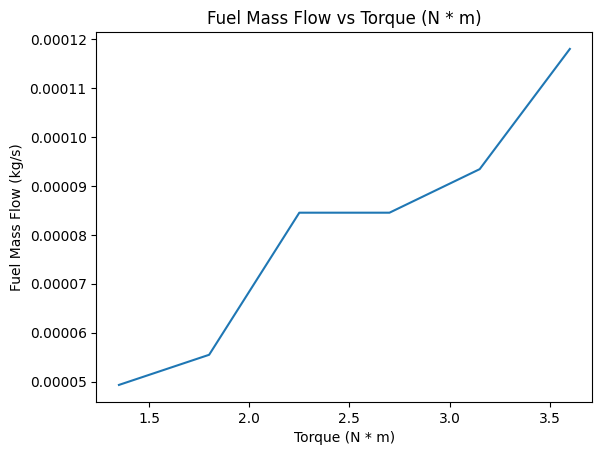

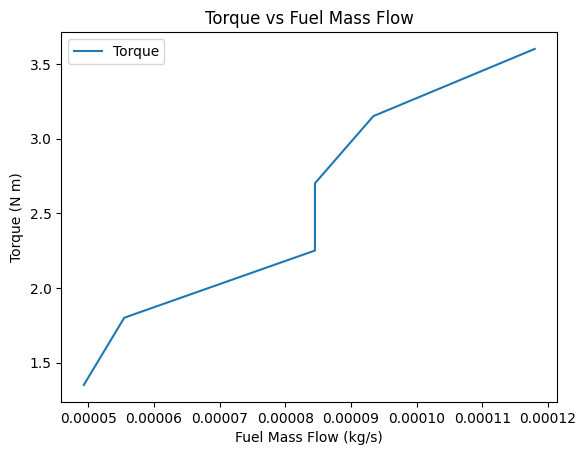

In [49]:
# Plot Qdot_shaft, Qdot_in, Qdot_exhaust, Qdot_fins vs Torque
plt.figure()
plt.plot(df['Torque (N * m)'], df['Power Input (W)'], label="Input Power: Gasoline (chemical)")
plt.plot(df['Torque (N * m)'], df['Fins Heat (W)'], label="Output Power: Fins (heat)")
plt.plot(df['Torque (N * m)'], df['Power Shaft (W)'], label="Output Power: Shaft (mechanical)")
plt.plot(df['Torque (N * m)'], df['Exhaust Heat (W)'], label="Output Power: Exhaust (heat)")
plt.xlabel('Torque (N * m)')
plt.ylabel('Power (W)')
plt.legend()
plt.title('Engine Performance vs Speed (RPM)')
plt.show()

# Plot fuel flow rate vs rpm
plt.figure()
plt.plot(df['Torque (N * m)'], df['Fuel Mass Flow (kg/s)'])
plt.xlabel('Torque (N * m)')
plt.ylabel('Fuel Mass Flow (kg/s)')
plt.title('Fuel Mass Flow vs Torque (N * m)')
plt.show()

# Plot Qdot_shaft, Qdot_in vs fuel flow rate
plt.figure()
plt.plot(df['Fuel Mass Flow (kg/s)'], df['Torque (N * m)'], label="Torque")
plt.xlabel('Fuel Mass Flow (kg/s)')
plt.ylabel('Torque (N m)')
plt.legend()
plt.title('Torque vs Fuel Mass Flow')
plt.show()
